# **Previsão de preço de carros.**
<!--
<img src="https://miro.medium.com/v2/resize:fit:988/0*tA5OjppLK627FfFo" alt="image" width="250" height="auto">
-->
Nesse projeto eu vou construir um modelo de **Machine Learning** que faça a previsão  do preço de venda de um veículo.

Irei utilizar a Metodologia **CRISP-DM** para me basear nos passos a serem seguinos no projeto.

1. **Compreensão do Negócio (Business Understanding/Problem)** 

1. **Compreensão dos Dados (Data Understanding)** 
1. **Preparação dos Dados (Data Preparation)** 
1. **EDA**
1. **Modelagem (Modeling)** 
1. **Avaliação (Evaluation)**
1. **Implantação (Deployment)** 

# **1. Problema de Negóscio**

*   1.1 Qual é o contexto?
    *   Uma pessoa precisa revender seu veículo porém ela **não sabe** qual valor deve cobrar no mesmo.
*   1.2 Quais são os objetivos do projeto?
    *   Identificar as características que influenciam os preços de venda dos veículos.
    *   Compreender quão bem essas características **descrevem o preço** do carro
    *   Criar um modelo capaz de "prever" o valor de venda de um veículo *inédito para o modelo*.
*   1.3 Quais são os benefícios?
    *   Vender o veículo com o valor *ótimo* de acordo com **suas características**.
    *   **Reduzir as perdas de dinheiro** na revenda do veículo.
    *   **Enconomizar esforços de energia/tempo** em tentar adivinhar o valor ideal.

Como resultado, o **problema de negócio** será resolvido.

### **Importando as bibliotecas necessárias.**

In [150]:
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
from platform import python_version
print('Versão da Linguagem Python:', python_version())

Versão da Linguagem Python: 3.12.5


In [152]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
# import matplotlib as mpl
import seaborn as sns

# Display options.
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_info_rows', 100)
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format
# pd.set_option('display.width', 1000)

# **2. Compreendendo os dados**
*   Os dados foram obtidos através de web scraping do site  [Olx](https://www.olx.com.br/autos-e-pecas/carros-vans-e-utilitarios?) e **são de propiedade do Grupo Olx**
*   O repositório do projeto de web scraping completo se encontra [aqui](https://github.com/PatrickLeal/olx-veiculos-web-scraping).
*   Os dados contém informações sobre os veículos anunciados no site. 

In [153]:
file_path = glob.glob('../data_lake/silver/*.csv')
df_carros = pd.read_csv(file_path[0], parse_dates=['DATA_PUBLICACAO'])           

In [154]:
df_carros.sample(3)

,TITULO,PRECO_BRL,DESCRICAO,OPCIONAIS,CEP,IMAGEM,PERFIL_CARRO,DATA_PUBLICACAO,TEMPO_PUBLICACAO,COD_PUBLICACAO,TIPO_ANUNCIO,QUILOMETRAGEM,POSSUI_KIT_GNV,TIPO_DE_VEICULO,CAMBIO,CATEGORIA,COR,TIPO_DE_DIREÇÃO,POTENCIA_DO_MOTOR,PORTAS,MODELO,FINAL_DE_PLACA,ANO,MARCA,COMBUSTIVEL
25408,Cruze 1.4 Turbo Sport6 LTZ2 18/18,90000.00,Versão LTZ2 (raridade - a mais completa com to...,"['Alarme', 'Air bag', 'Ar condicionado', 'Câme...",12223620,https://img.olx.com.br/images/52/5284904208973...,https://sp.olx.com.br/vale-do-paraiba-e-litora...,2024-09-30,10:05,1324390348,NaN,103000,Não,Hatch,Automático,"Carros, vans e utilitários",Vermelho,Elétrica,1.4,4 portas,CHEVROLET CRUZE SPORT LTZ 1.4 16V TB FLEX 5P AUT.,9.00,2018,CHEVROLET,Flex
5560,Volkswagen Fox Trendline 1.0 Flex 2014/2015 Ab...,40000.00,"Vendo veículo no estado,abaixo do valor de tab...","['Air bag', 'Trava elétrica', 'Vidro elétrico']",66063000,https://img.olx.com.br/images/67/6774563284510...,https://pa.olx.com.br/regiao-de-belem/autos-e-...,2024-09-10,11:21,1336427165,profissional,119000,Não,Hatch,Manual,"Carros, vans e utilitários",Preto,Elétrica,1.0,4 portas,VOLKSWAGEN FOX TRENDLINE 1.0 FLEX 8V 5P,NaN,2015,VOLKSWAGEN,Flex
35116,Renault Kwid 2023 1.0 12v sce flex intense manual,55890.00,RENAULT KWID 1.0 12V SCE FLEX INTENSE MANUAL -...,"['Ar condicionado', 'Trava elétrica']",31230010,https://img.olx.com.br/images/73/7354673317356...,https://mg.olx.com.br/belo-horizonte-e-regiao/...,2024-10-02,12:56,1327184559,profissional,78658,Não,Hatch,Manual,"Carros, vans e utilitários",Branco,Elétrica,1.0,4 portas,RENAULT KWID 1.0 INTENSE,6.00,2023,RENAULT,Flex


### **Dicionário de dados**

|VARIÁVEL| DESCRIÇÃO | TIPO |
|--------|-----------|------|
|**TITULO:**| Título do anúncio| string |
|**PRECO_BRL:**| Preço em Reais R$| int |
|**DESCRICAO:**| Descrição do anúncio deixada pelo anunciante| string |
|**OPCIONAIS:**| São *features* dos veículos informadas pelo anunciante| string |
|**CEP:**| Localização veículo deixada pelo anunciante | int |
|**IMAGEM:**| Link da foto de perfil do anúncio | string |
|**PERFIL_CARRO:**| Link para o anúncio original | string |
|**DATA_PUBLICACAO:**| Date em que o anúncio foi criado| date |
|**TEMPO_PUBLICACAO:**| Hora em que o anúncio foi criado| time |
|**COD_PUBLICACAO:**| Código do anúncio| int |
|**TIPO_ANUNCIO:**| Tipo de anúncio| string|
|**ANO:**| Informa o Ano doveículo| int |
|**MARCA:**| Nome da marca do veículo| string |
|**CAMBIO:**| Tipo de câmbio do veículo | string |
|**POSSUI_KIT_GNV:**| Se o veículo possui kit GNV| bool |
|**PORTAS:**| Quantidade de portas que o veículo possui| int |
|**POTENCIA_DO_MOTOR:**| Informa a potência do motor | string |
|**TIPO_DE_VEICULO:**| Informa o tipo de veículo |string |
|**FINAL_DE_PLACA:**| Informa o final da placa| int |
|**COR:**| Informa a cor do veículo| string |
|**QUILOMETRAGEM:**| Informa a quilometragem do veículo| string |
|**COMBUSTIVEL:**| Informa o o tipo de combustível usado pelo veículo| string|
|**TIPO_DE_DIREÇÃO:**| Informa o tipo de direção do veículo| string |
|**MODELO:**| Informa o modelo do veículo|string |
|**CATEGORIA:**| Informa e qual categoria o veículo foi anunciado |string |

`PRECO_BRL`  será nossa variável ***target***

### **Informações gerais dos dados:**

In [155]:
df_carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42812 entries, 0 to 42811
Data columns (total 25 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TITULO             object        
 1   PRECO_BRL          float64       
 2   DESCRICAO          object        
 3   OPCIONAIS          object        
 4   CEP                int64         
 5   IMAGEM             object        
 6   PERFIL_CARRO       object        
 7   DATA_PUBLICACAO    datetime64[ns]
 8   TEMPO_PUBLICACAO   object        
 9   COD_PUBLICACAO     int64         
 10  TIPO_ANUNCIO       object        
 11  QUILOMETRAGEM      int64         
 12  POSSUI_KIT_GNV     object        
 13  TIPO_DE_VEICULO    object        
 14  CAMBIO             object        
 15  CATEGORIA          object        
 16  COR                object        
 17  TIPO_DE_DIREÇÃO    object        
 18  POTENCIA_DO_MOTOR  object        
 19  PORTAS             object        
 20  MODELO             object   

In [156]:
print(f"O dataset possui {df_carros.shape[0]} linhas e {df_carros.shape[1]} colunas.")

O dataset possui 42812 linhas e 25 colunas.


**Visualisando algumas estatísticas:**

In [157]:
df_carros.describe().T

,count,mean,min,25%,50%,75%,max,std
PRECO_BRL,42433.00,87398.47,0.00,53910.00,72990.00,105000.00,4950000.00,69748.45
CEP,42812.00,39944690.90,1007040.00,13206765.00,30720310.00,69054677.00,99700054.00,29495530.35
DATA_PUBLICACAO,42812,2024-09-23 04:08:03.677473792,2024-07-12 00:00:00,2024-09-13 00:00:00,2024-09-23 00:00:00,2024-10-02 00:00:00,2024-10-11 00:00:00,NaN
COD_PUBLICACAO,42812.00,1331096634.52,561293243.00,1330533453.75,1336266412.00,1339011872.75,1345043198.00,22883398.81
QUILOMETRAGEM,42812.00,71800.88,0.00,43245.00,53074.00,90000.00,9999999.00,87709.07
FINAL_DE_PLACA,37114.00,4.38,0.00,2.00,4.00,7.00,9.00,2.88


**Análise:**
-   o dataset possui anúncios com o **preço** de venda **igual a 0**, o que não faz sentido nesse contexto
-   alguns dados estão com **tipos errados** e precisam ser tradados

**Verificando valores nulos e duplicados:**

In [158]:
print("Porcentagem de valores nulos.")
(df_carros.isnull().sum() / df_carros.shape[0]) * 100

Porcentagem de valores nulos.


TITULO               0.00
PRECO_BRL            0.89
DESCRICAO            0.00
OPCIONAIS            0.00
CEP                  0.00
IMAGEM               0.00
PERFIL_CARRO         0.00
DATA_PUBLICACAO      0.00
TEMPO_PUBLICACAO     0.00
COD_PUBLICACAO       0.00
TIPO_ANUNCIO        23.04
QUILOMETRAGEM        0.00
POSSUI_KIT_GNV       0.00
TIPO_DE_VEICULO     12.96
CAMBIO               0.43
CATEGORIA            0.00
COR                  2.32
TIPO_DE_DIREÇÃO      5.85
POTENCIA_DO_MOTOR    4.77
PORTAS               1.59
MODELO               0.00
FINAL_DE_PLACA      13.31
ANO                  0.00
MARCA                0.00
COMBUSTIVEL          0.45
dtype: float64

In [159]:
print(f"Quantidade de valores duplicados: {df_carros.duplicated().sum()}")

Quantidade de valores duplicados: 5970


**Ações a serem tomada:**
*   remover duplicatas
*   remover colunas que tenham mais de 15% de valores nulos
*   remover coluna *CATEGORIA* porque ela só possui 1  valor único
*   alterar os tipos de dados das colunas:
    1. ANO
    1. PORTAS
    1. POTENCIA_DO_MOTOR
    1. OPCIONAIS
*   remover valores nulos

In [160]:
import os
import sys

module_path = os.path.abspath(os.getcwd() + '//..')
if module_path not in sys.path:
    sys.path.append(module_path)

from scripts import cleaning_tool

df_cleaned = cleaning_tool.limpar_dados_silver(df_carros)

In [161]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28469 entries, 0 to 28468
Data columns (total 23 columns):
 #   Column             Dtype         
---  ------             -----         
 0   titulo             object        
 1   preco_brl          int64         
 2   descricao          object        
 3   opcionais          object        
 4   cep                category      
 5   imagem             object        
 6   perfil_carro       object        
 7   data_publicacao    datetime64[ns]
 8   tempo_publicacao   object        
 9   cod_publicacao     int64         
 10  quilometragem      int64         
 11  possui_kit_gnv     object        
 12  tipo_de_veiculo    object        
 13  cambio             object        
 14  cor                object        
 15  tipo_de_direção    object        
 16  potencia_do_motor  category      
 17  portas             int64         
 18  modelo             object        
 19  ano                int64         
 20  marca              object   

In [162]:
# df_carros.drop_duplicates(inplace=True)
print("Porcentagem de valores nulos.")
(df_cleaned.isnull().sum() / df_carros.shape[0]) * 100

Porcentagem de valores nulos.


titulo              0.00
preco_brl           0.00
descricao           0.00
opcionais           0.00
cep                 0.00
imagem              0.00
perfil_carro        0.00
data_publicacao     0.00
tempo_publicacao    0.00
cod_publicacao      0.00
quilometragem       0.00
possui_kit_gnv      0.00
tipo_de_veiculo     0.00
cambio              0.00
cor                 0.00
tipo_de_direção     0.00
potencia_do_motor   0.00
portas              0.00
modelo              0.00
ano                 0.00
marca               0.00
combustivel         0.00
qtd_opcionais       0.00
dtype: float64

Agora não há mais dados nulos e seus tipos estão corretos.

# **3. Dividir os dados em treino e teste**
*   A **análise exploratória de dados** será feita nos dados de treino na intenção de evitar *data leakage*
*   O objetivo principal da divisão é verificar o quão bem o modelo pode fazer previsões em **dados que ele nunca viu antes**. 
*   Se o modelo for avaliado apenas nos **dados de treino**, o resultado pode ser tendencioso, pois o modelo já viu aqueles dados.

Removendo variáveis que não importam para nossa análise tendo como **premissa** que tais variáveis **não influenciam** na precificação do veículo.

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
df_filtrado = df_cleaned.drop(columns=['imagem', 'perfil_carro', 'tempo_publicacao', 'cod_publicacao',
                                       'titulo', 'descricao', 'cep', 'data_publicacao']).copy()
df_filtrado = df_filtrado.drop_duplicates()
X = df_filtrado.drop(columns=['preco_brl'])
y = df_filtrado['preco_brl'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [165]:
print(f"Shape do dataset predictor de treino: {X_train.shape}")
print(f"Shape do dataset target de treino: {y_train.shape}")
print(f"Shape do dataset predictor de teste: {X_test.shape}")
print(f"Shape do dataset target de teste: {y_test.shape}")

Shape do dataset predictor de treino: (17589, 14)
Shape do dataset target de treino: (17589,)
Shape do dataset predictor de teste: (7539, 14)
Shape do dataset target de teste: (7539,)


# **4. Explorando os dados (EDA)**

Eu vou explorar os dados em busca de entender melhor como as variáveis se comportam e também tentar **obter algum insight** com os dados.

Antes eu preciso juntar novamente as variáveis descritivas junto com a variável *target*, porém apenas do dataset de **treino**.

In [166]:
train = pd.concat([X_train, y_train], axis=1)
train.sample(3, random_state=42)

,opcionais,quilometragem,possui_kit_gnv,tipo_de_veiculo,cambio,cor,tipo_de_direção,potencia_do_motor,portas,modelo,ano,marca,combustivel,qtd_opcionais,preco_brl
15317,"Alarme, Ar condicionado, Trava elétrica",52241,Não,Hatch,Manual,Preto,Elétrica,1.0,4,CHEVROLET ONIX HATCH LT 1.0 8V FLEXPOWER 5P MEC.,2023,CHEVROLET,Flex,3,72190
11072,"Alarme, Ar condicionado, Sensor de ré, Trava e...",19829,Não,Hatch,Manual,Prata,Elétrica,1.0,4,CHEVROLET PLUS LTZ 1.0 12V TB FLEX MEC. 4P,2023,CHEVROLET,Flex,4,86490
18490,"Alarme, Air bag, Ar condicionado, Sensor de ré...",160000,Não,Sedã,Manual,Prata,Hidráulica,1.0,4,FIAT SIENA EL 1.0 MPI FIRE FLEX 8V 4P,2013,FIAT,Flex,10,31500


Criando listas com as variáveis **categóricas, numéricas e target** para auxiliar na análise.

In [167]:
num_features = X_train.select_dtypes('number').columns.tolist()
cat_features = X_train.select_dtypes(['object', 'category']).columns.tolist()
target = 'preco_brl'

print(f"Há {len(num_features)} variáveis numéricas.\nElas são: {num_features}\n")
print(f"Há {len(cat_features)} variáveis categóricas.\nElas são: {cat_features}")
print(f"\nA variável target será: '{target}'")

Há 4 variáveis numéricas.
Elas são: ['quilometragem', 'portas', 'ano', 'qtd_opcionais']

Há 10 variáveis categóricas.
Elas são: ['opcionais', 'possui_kit_gnv', 'tipo_de_veiculo', 'cambio', 'cor', 'tipo_de_direção', 'potencia_do_motor', 'modelo', 'marca', 'combustivel']

A variável target será: 'preco_brl'


In [168]:
print("Valores únicos por variável categórica:")
print("-"*40)
train[cat_features].nunique()

Valores únicos por variável categórica:
----------------------------------------


opcionais            2515
possui_kit_gnv          2
tipo_de_veiculo        10
cambio                  4
cor                    10
tipo_de_direção         5
potencia_do_motor      12
modelo               2308
marca                  47
combustivel             6
dtype: int64

Analisando mais atentamente a variável `opcionais`:

In [169]:
unique_opcional = list(train.opcionais[1].split(','))
for linha in train.opcionais:
    for feat in linha.split(','):
        if feat not in unique_opcional:
            unique_opcional.append(feat)
unique_opcional = [op.strip() for op in unique_opcional]            
unique_opcional = list(dict.fromkeys(unique_opcional))
print(f'Há {len(unique_opcional)} valores únicos na variável "opcionais".')

Há 19 valores únicos na variável "opcionais".


*   São mais de **2500 combinações diferentes** envolvendo os 19 valores únicos da variável `opcionais`.

### **Análise Univariada.**

#### **Analisando a distribuição da variável target:**

In [170]:
from scripts import eda_tool

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
%matplotlib inline

mpl.style.use('ggplot') 

mpl.rcParams['axes.facecolor'] = 'white'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['xtick.color']    = 'black'
mpl.rcParams['ytick.color']    = 'black'
mpl.rcParams['grid.color']     = 'lightgray'
mpl.rcParams['figure.dpi']     = 150
plt.rcParams['figure.figsize'] = (14, 6)
mpl.rcParams['axes.grid']      = True
mpl.rcParams['font.size']      = 12

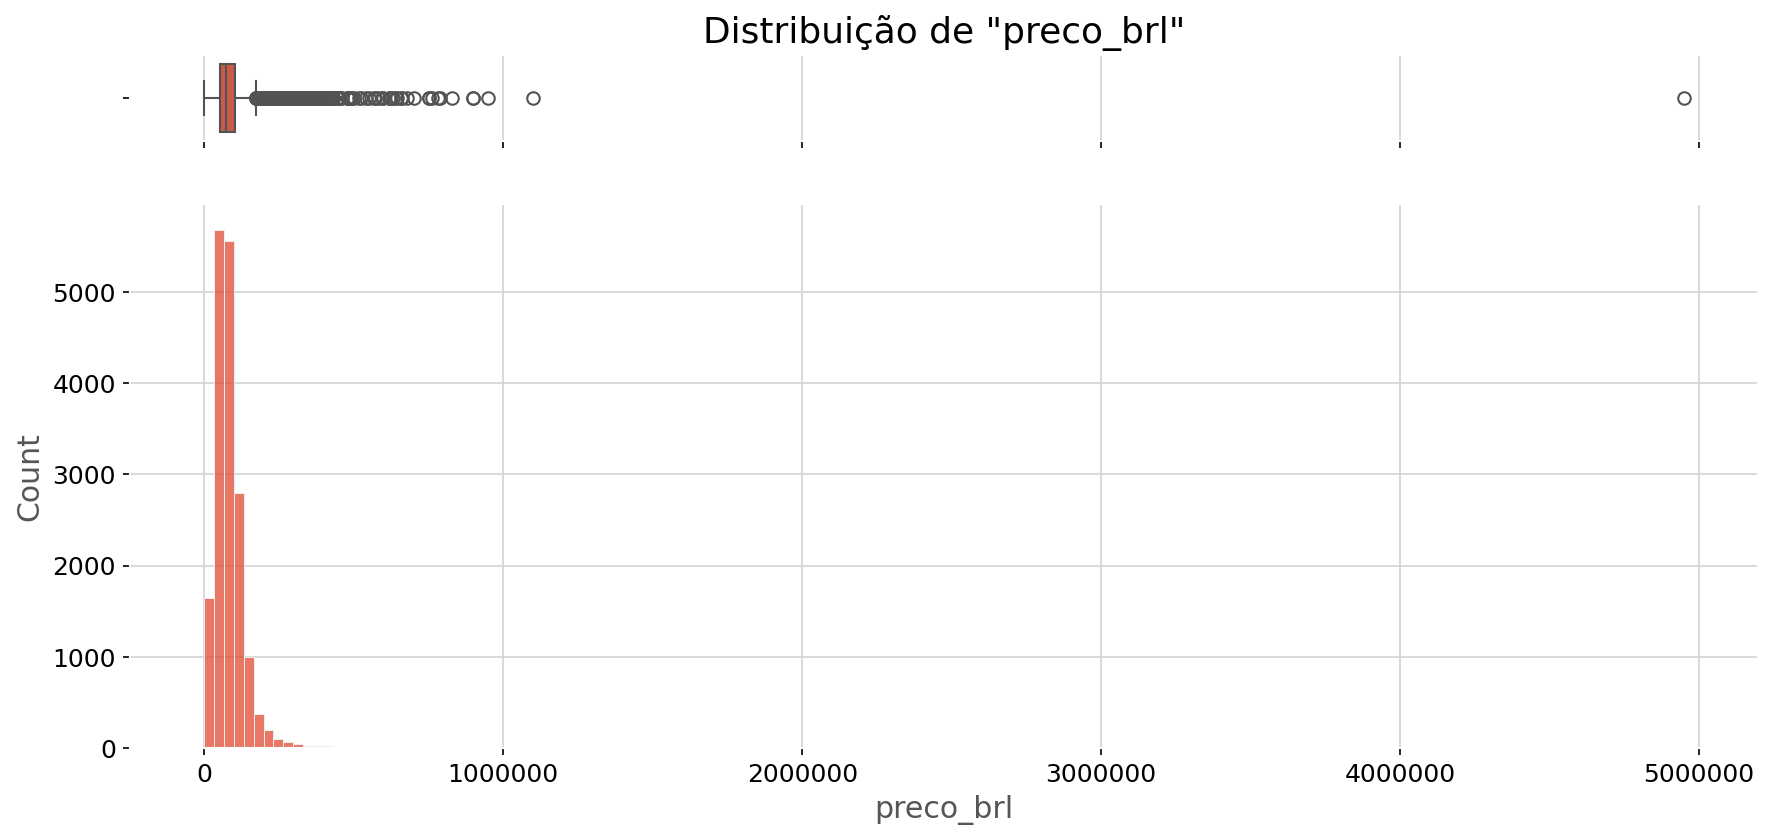

In [171]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .95)})
 
# assigning a graph to each ax
sns.boxplot(data=train, x=target, orient="h", ax=ax_box)
sns.histplot(data=train, x=target, ax=ax_hist, bins=150)
 
# Remove x axis name for the boxplot
ax_box.set_title(label='Distribuição de "preco_brl"')
plt.ticklabel_format(style='plain', axis='x')
ax_box.set(xlabel='')
plt.show()

Há evidentemente valores descrepantes nos preços
*   A base possui **um único** veículo com o preço de aproximadamente 5 milhões de reais.

Vamos verificar qual é esse vaículo:

In [192]:
train.loc[train['preco_brl'].idxmax()]['modelo']

'FERRARI GTC4 LUSSO 6.3 V12 690CV'

Uma **Ferrari** é o veículo mais caro, faz sentido se tratando de uma marca de luxo.

#### **Demais variáveis numéricas:**

Analisando a distribuição das variáveis numéricas.

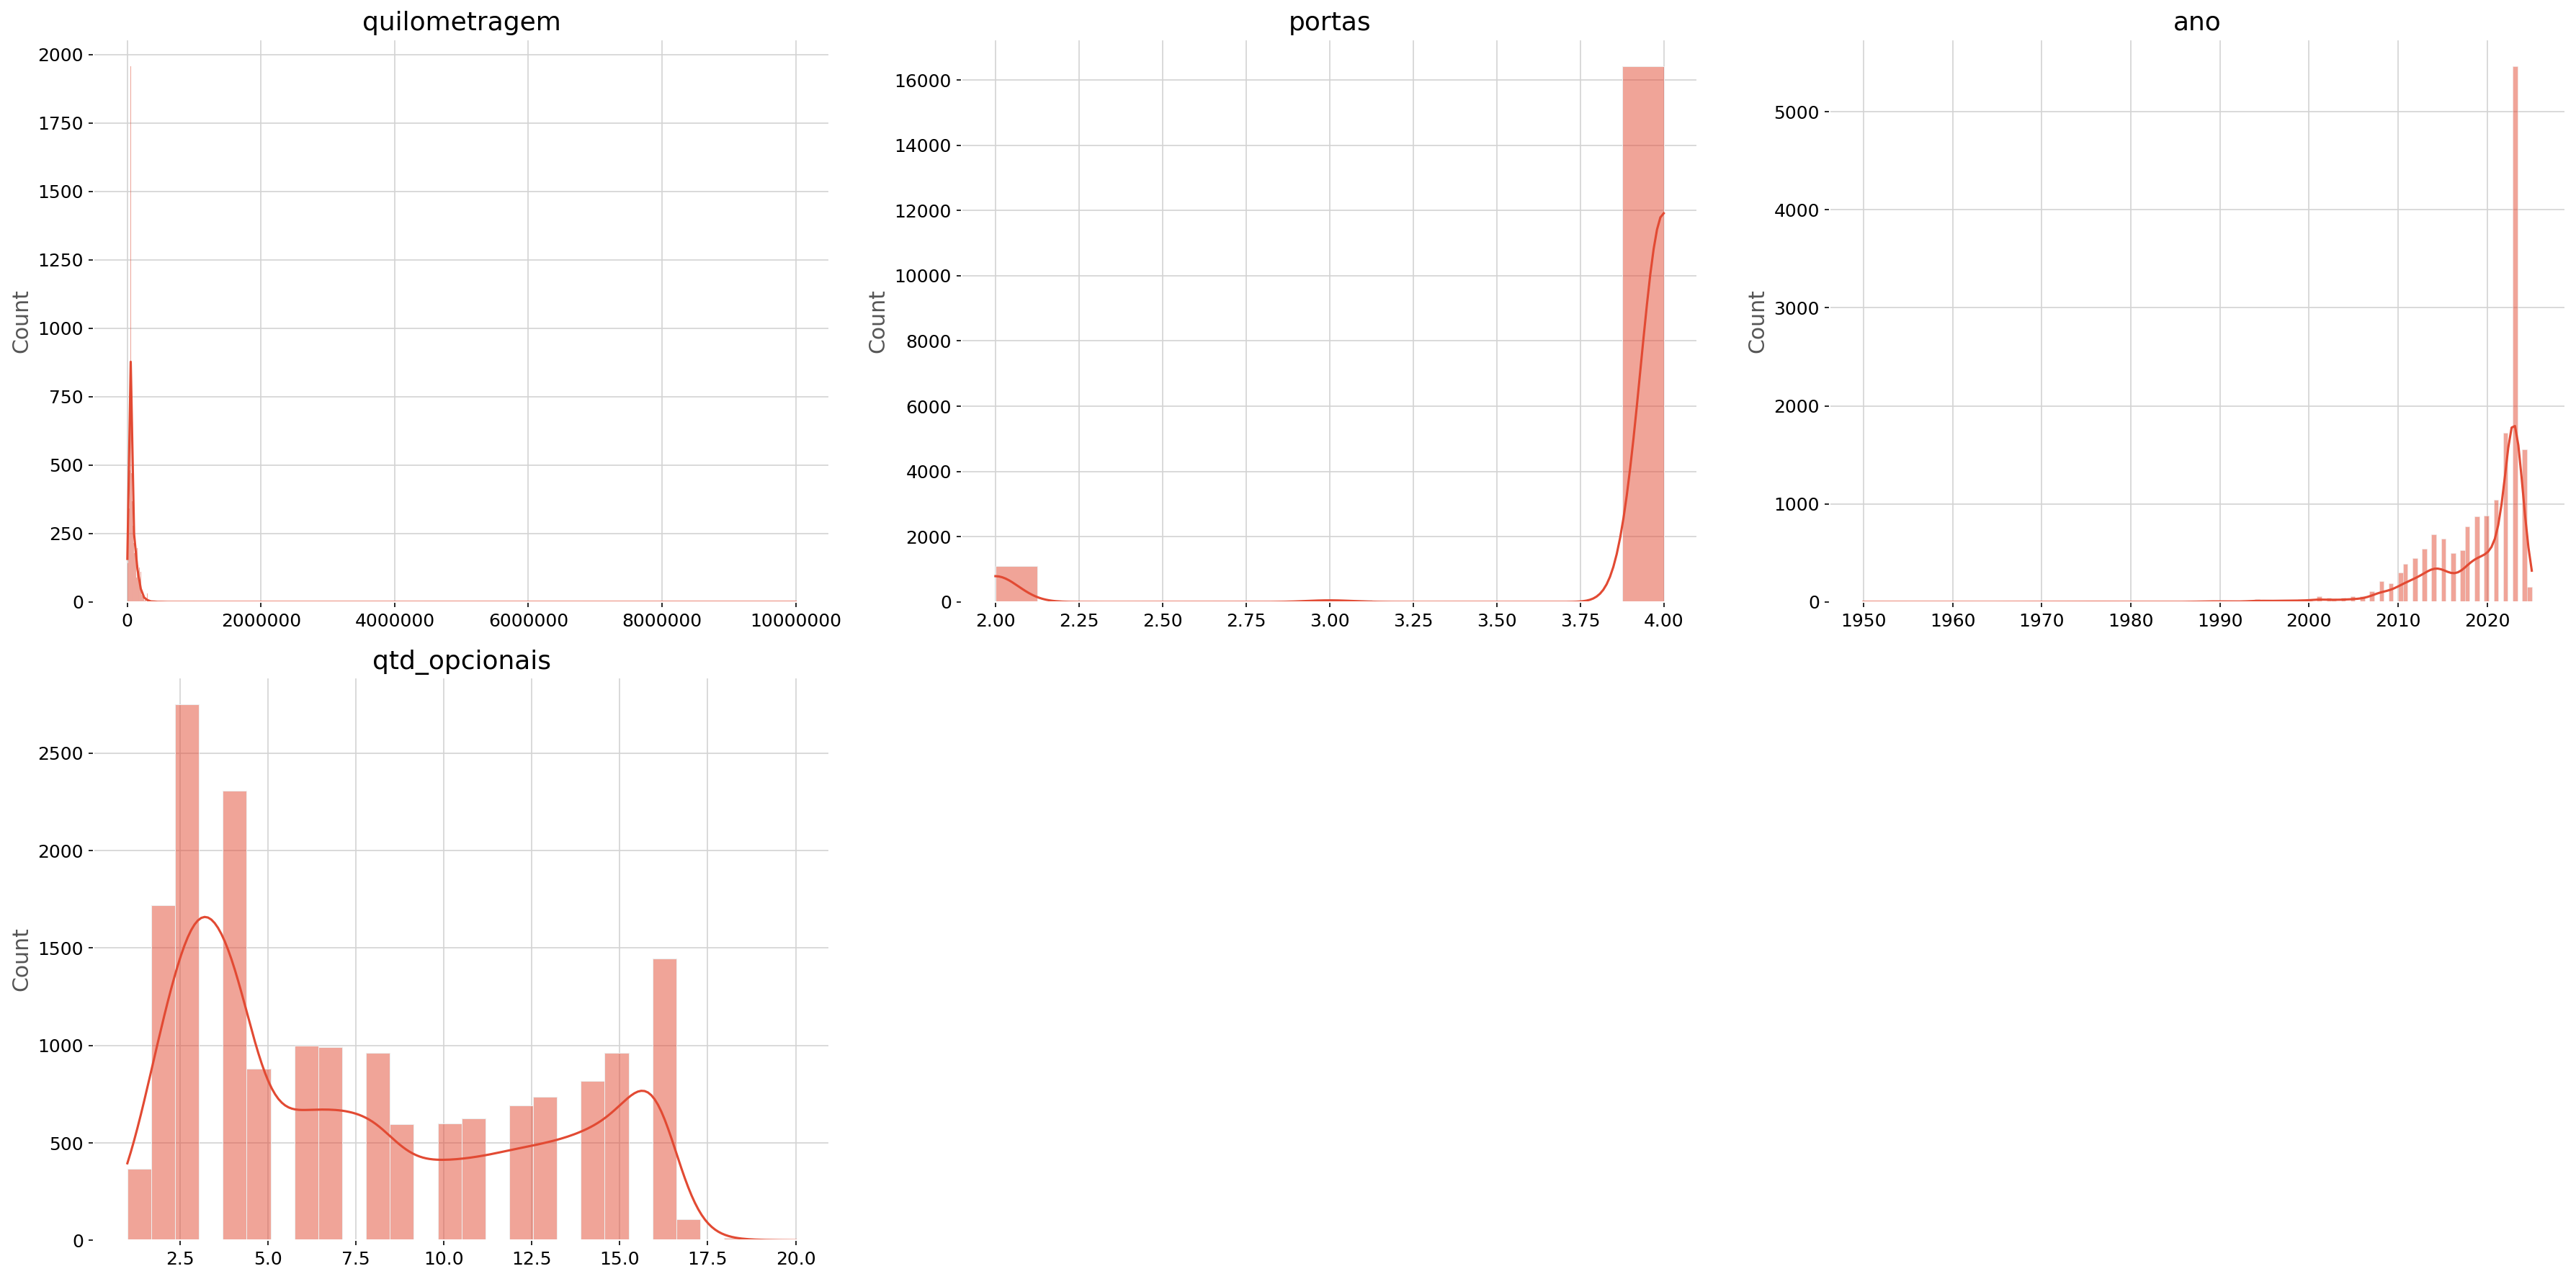

In [172]:
eda_tool.make_eda_plots(data=train, features=num_features, kde=True)


#### **Outliers**
Averiguando a ocorrência de outliers

In [173]:
eda_tool.check_outliers(train, num_features)

Há 2859 outliers no dataset.

Quantidade e porcentagem outliers por feature: 

quilometragem: 1187 (6.75)%
portas: 1162 (6.61)%
ano: 510 (2.9)%
qtd_opcionais: 0 (0.0)%


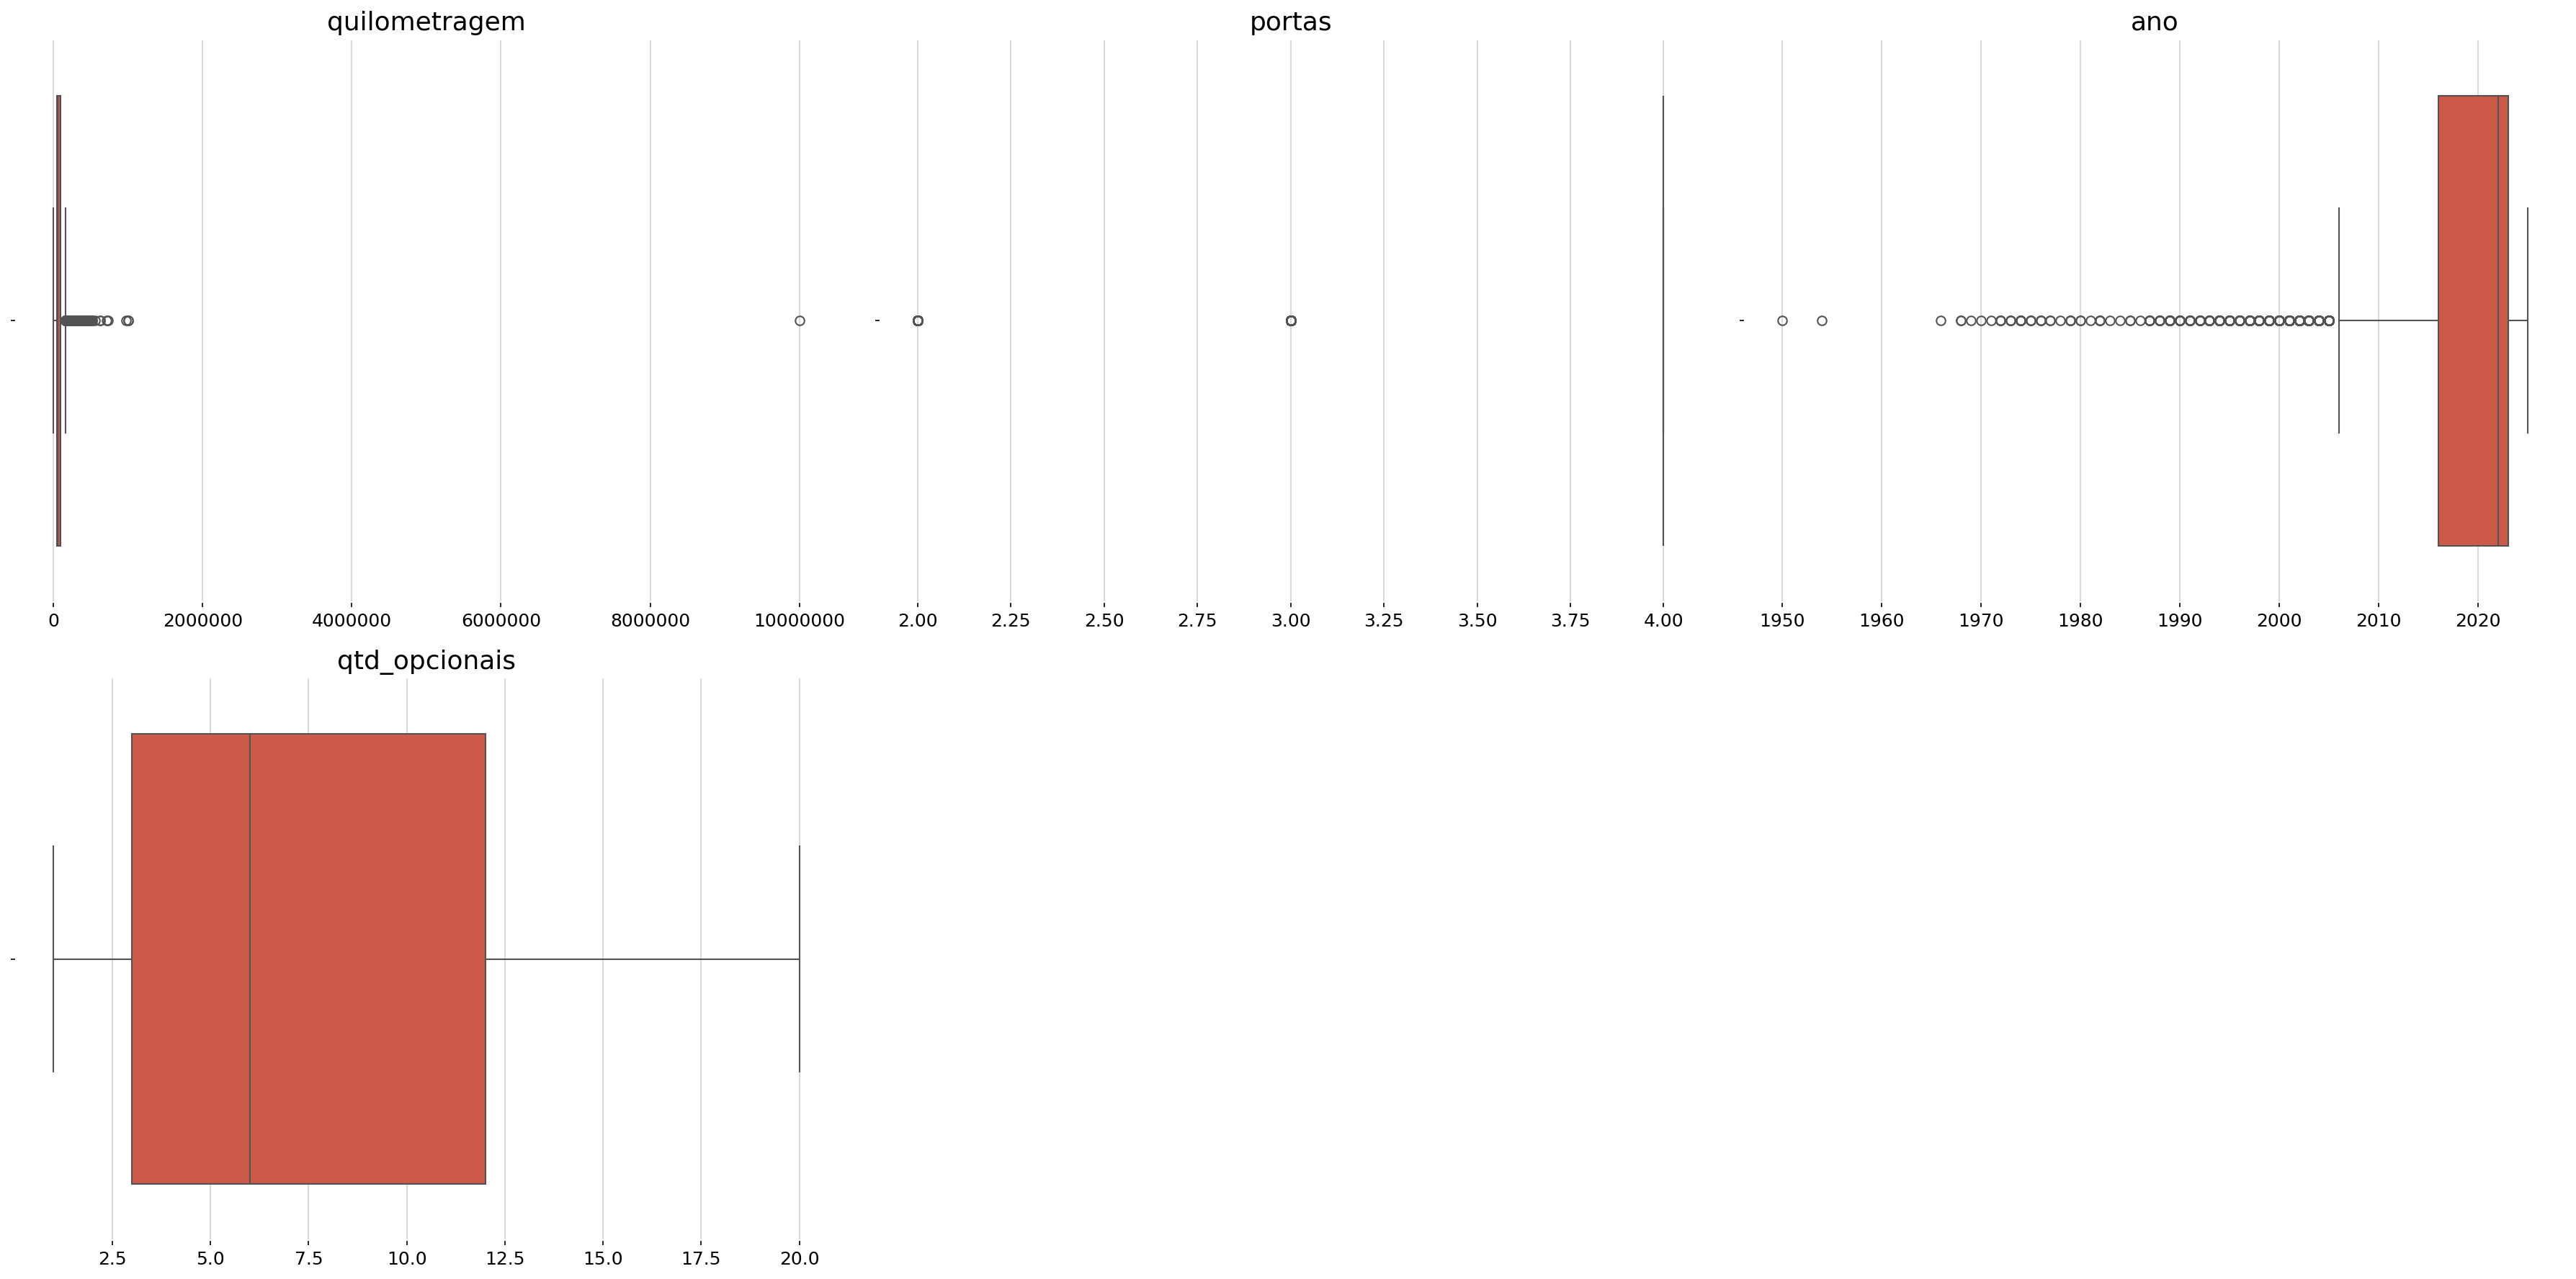

In [174]:
eda_tool.make_eda_plots(data=train, features=num_features, kind='boxplot')

In [175]:
train['portas'].value_counts()

portas
4    16427
2     1092
3       70
Name: count, dtype: int64

*   Embora `portas` apresente outliers, os números de portas dos veículos condizem com a realidade, assim como o `ano` de laçamento do veículo, há veículos que foram lançados há **mais de 50 anos** 
*   A variável `quilometragem` também possui outliers.

**INSIGHTS:**
*   Grande parte dos veículos tem **10** `anos` ou menos
*   A maioria possui **4** `portas`


#### **Variáveis categóricas:**

**Proporção de variáveis categóricas:**

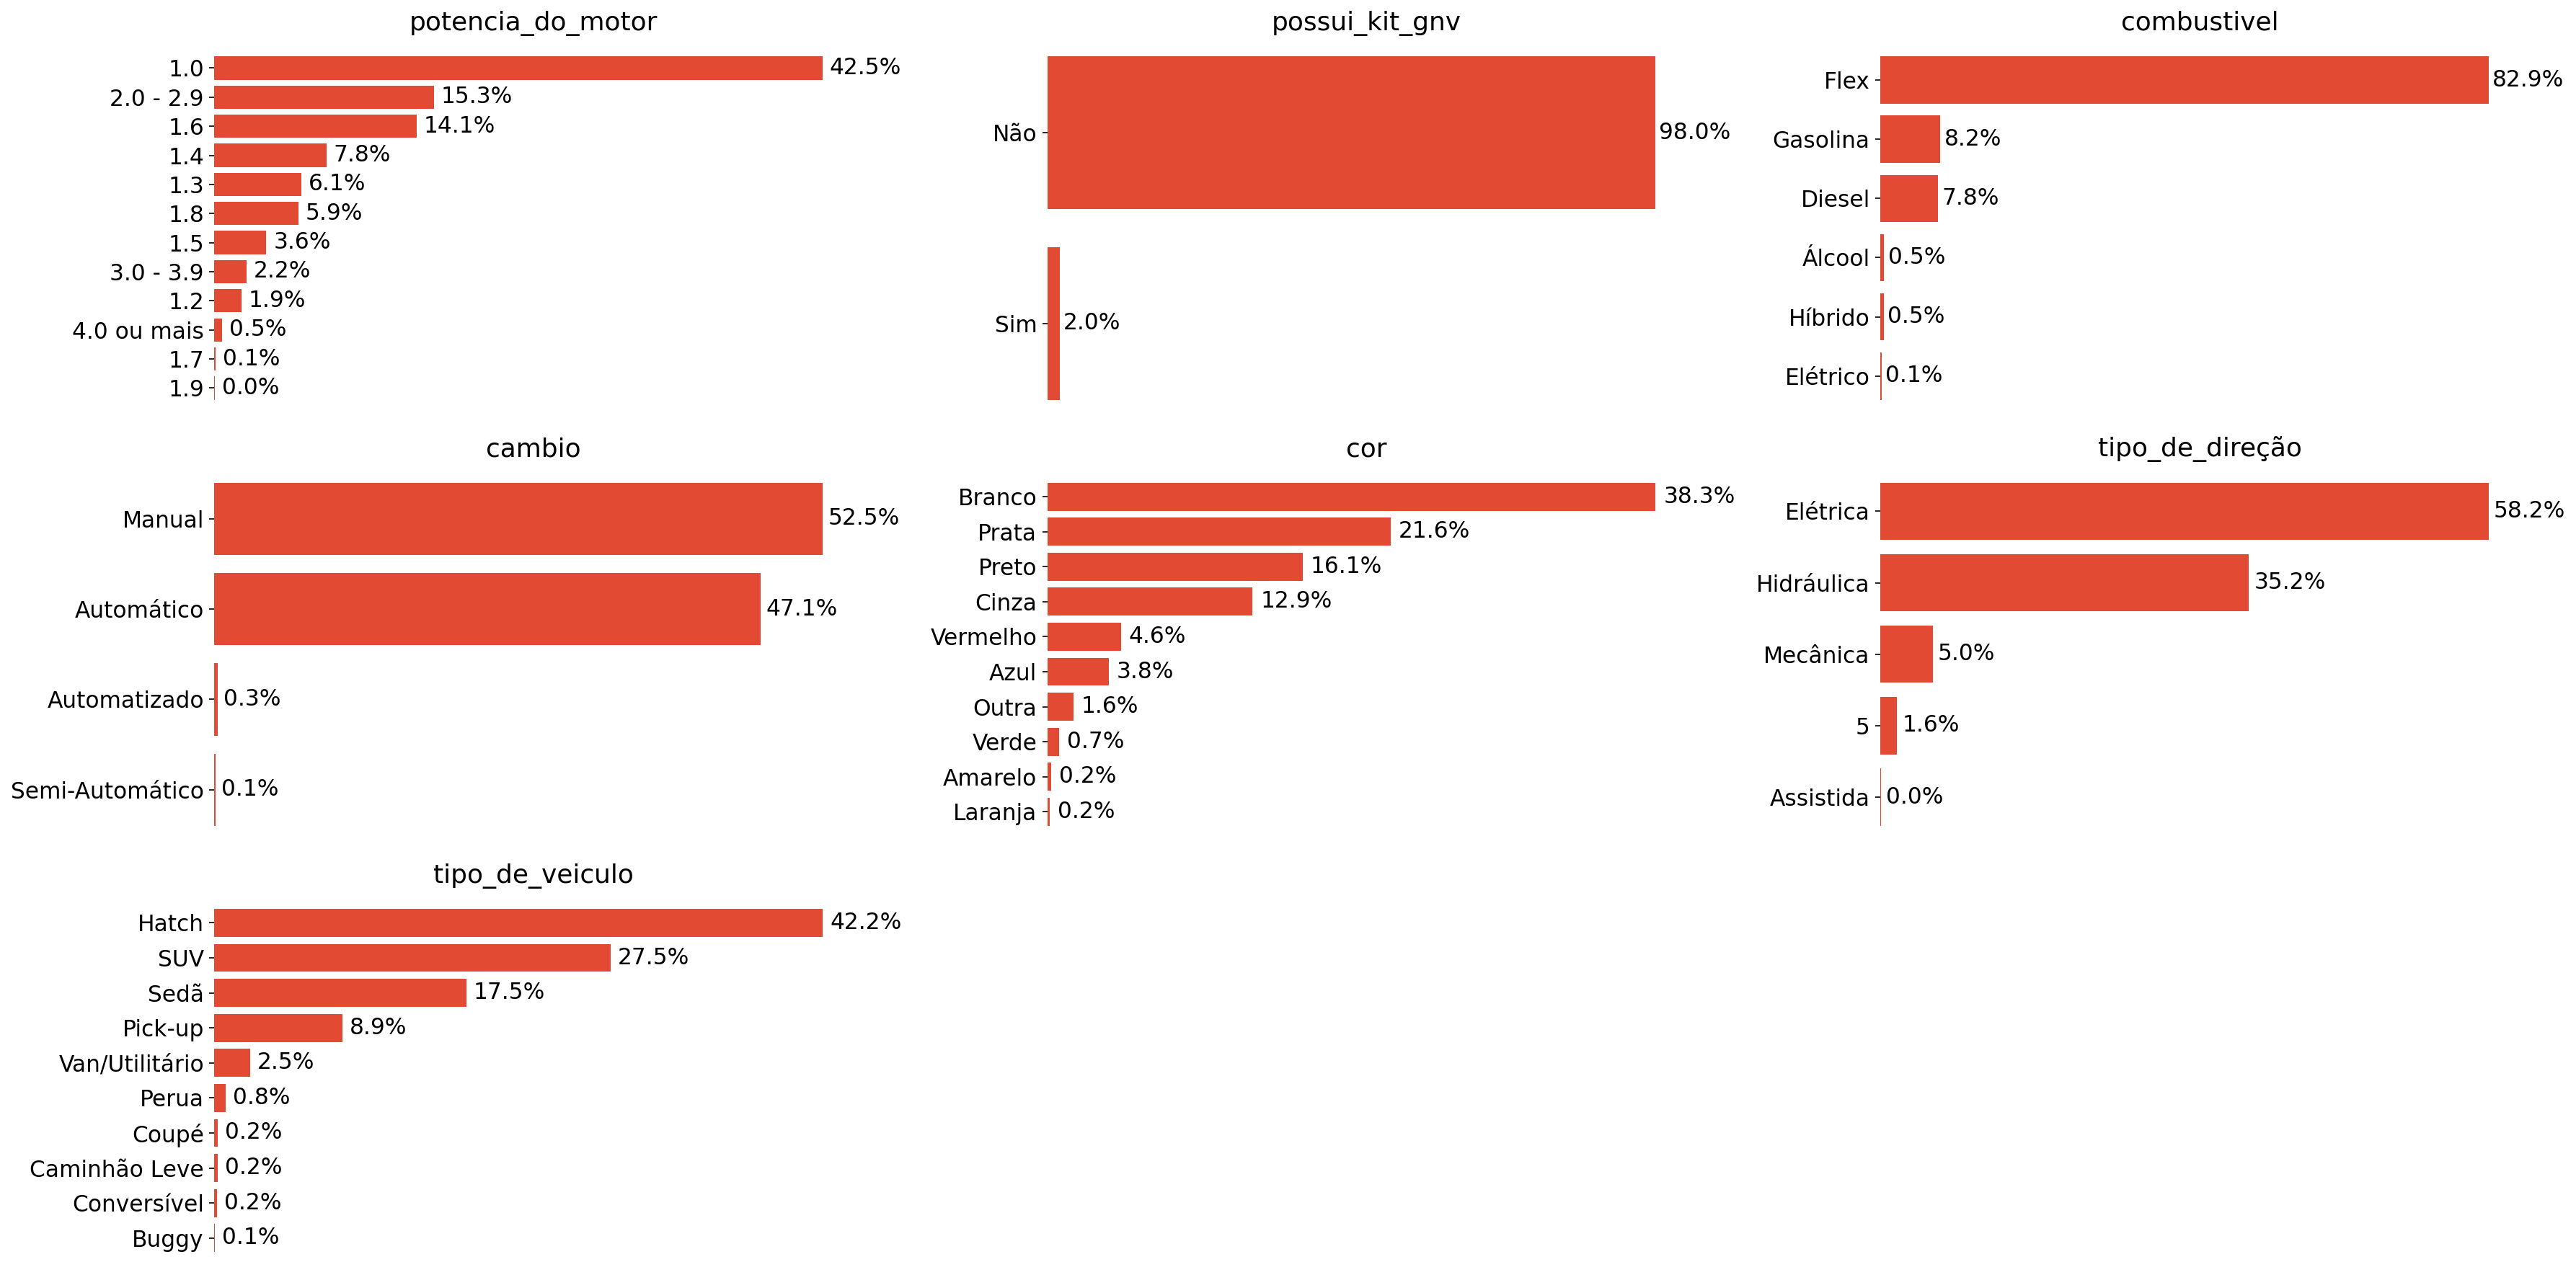

In [176]:
cat_features_to_plot = ['potencia_do_motor', 'possui_kit_gnv', 'combustivel',
                         'cambio', 'cor', 'tipo_de_direção', 'tipo_de_veiculo']

eda_tool.make_eda_plots(data=train, features=cat_features_to_plot, kind='barplot')

Como as variáveis `modelo` e `opcionais`  possuem muitas categorias, irei  plotar os gráficos individualmente.

In [177]:
def plot_top_n(data, feature, N:int=15):  
    top_feature = data[feature].value_counts(normalize=True).head(N).reset_index()\
                               .sort_values(by='proportion', ascending=True)
    # plt.figure(figsize=(18, 12))
    plt.barh(y=top_feature[feature], width=top_feature['proportion'])
    plt.title(f'Top {N} {feature}')
    plt.xlabel('Proporção')
    plt.ylabel(feature.capitalize())
    plt.tight_layout()
    plt.show()

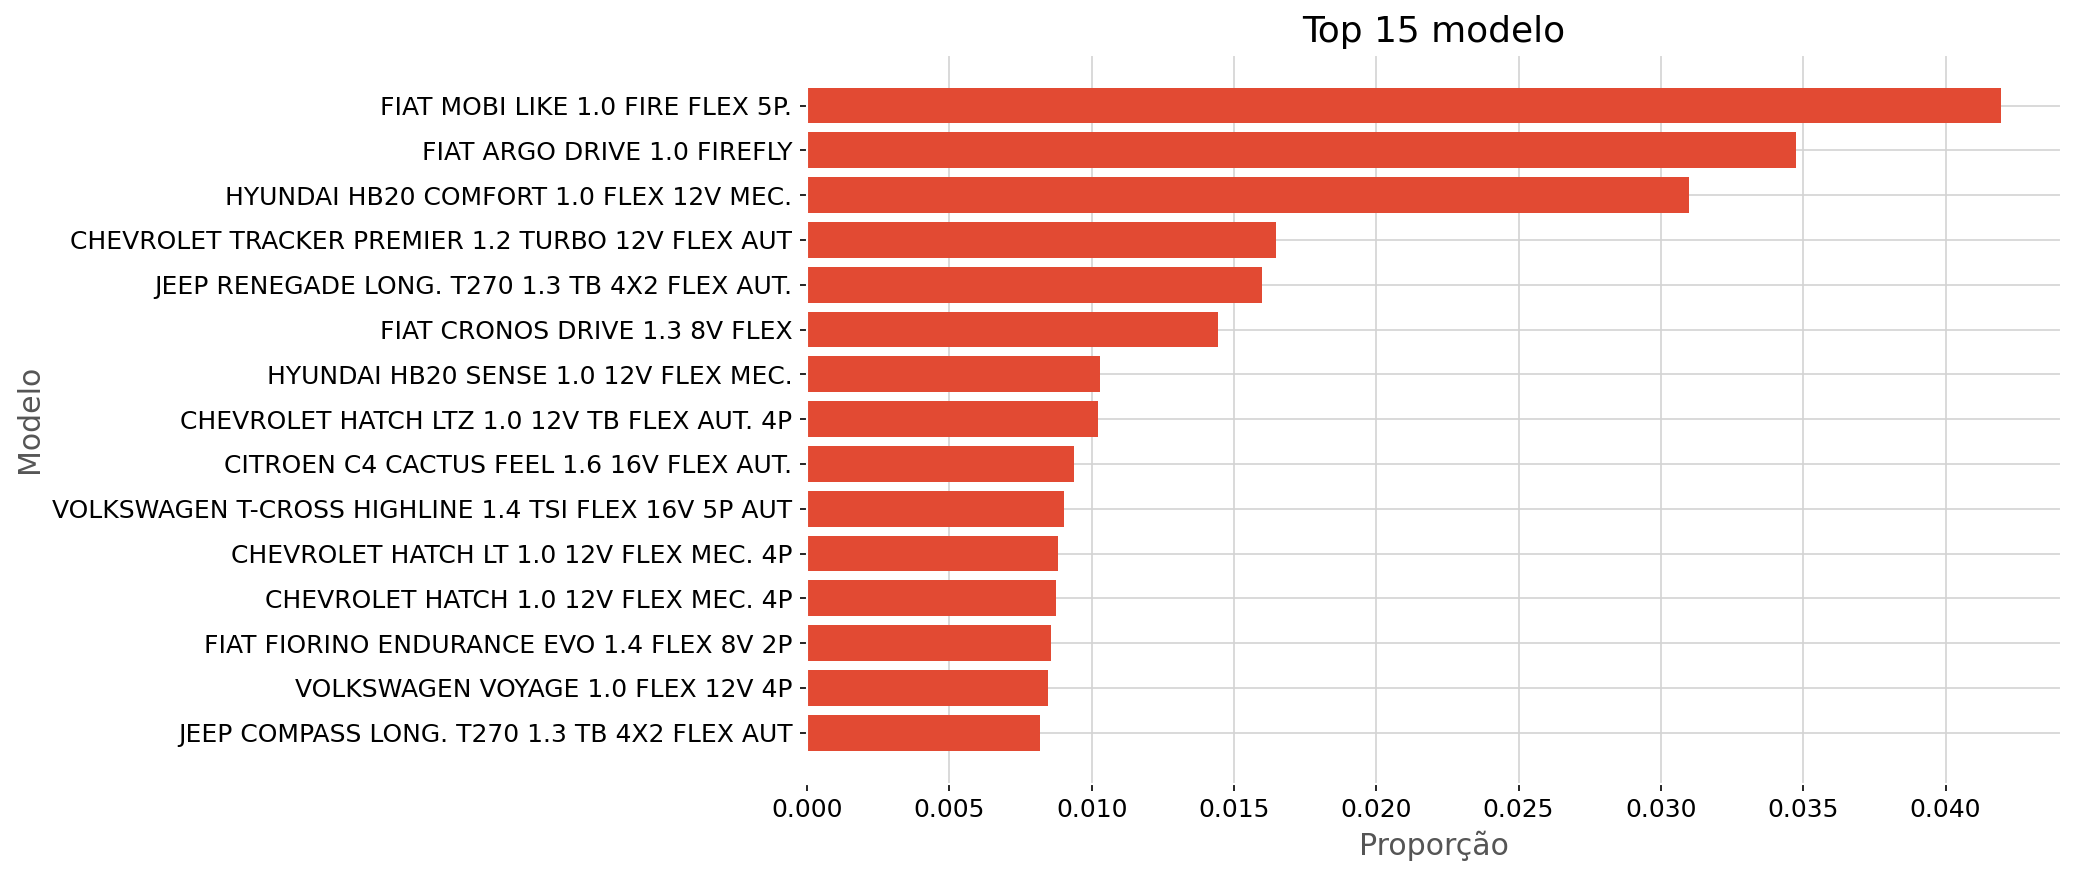

In [178]:
plot_top_n(train, 'modelo', 15)

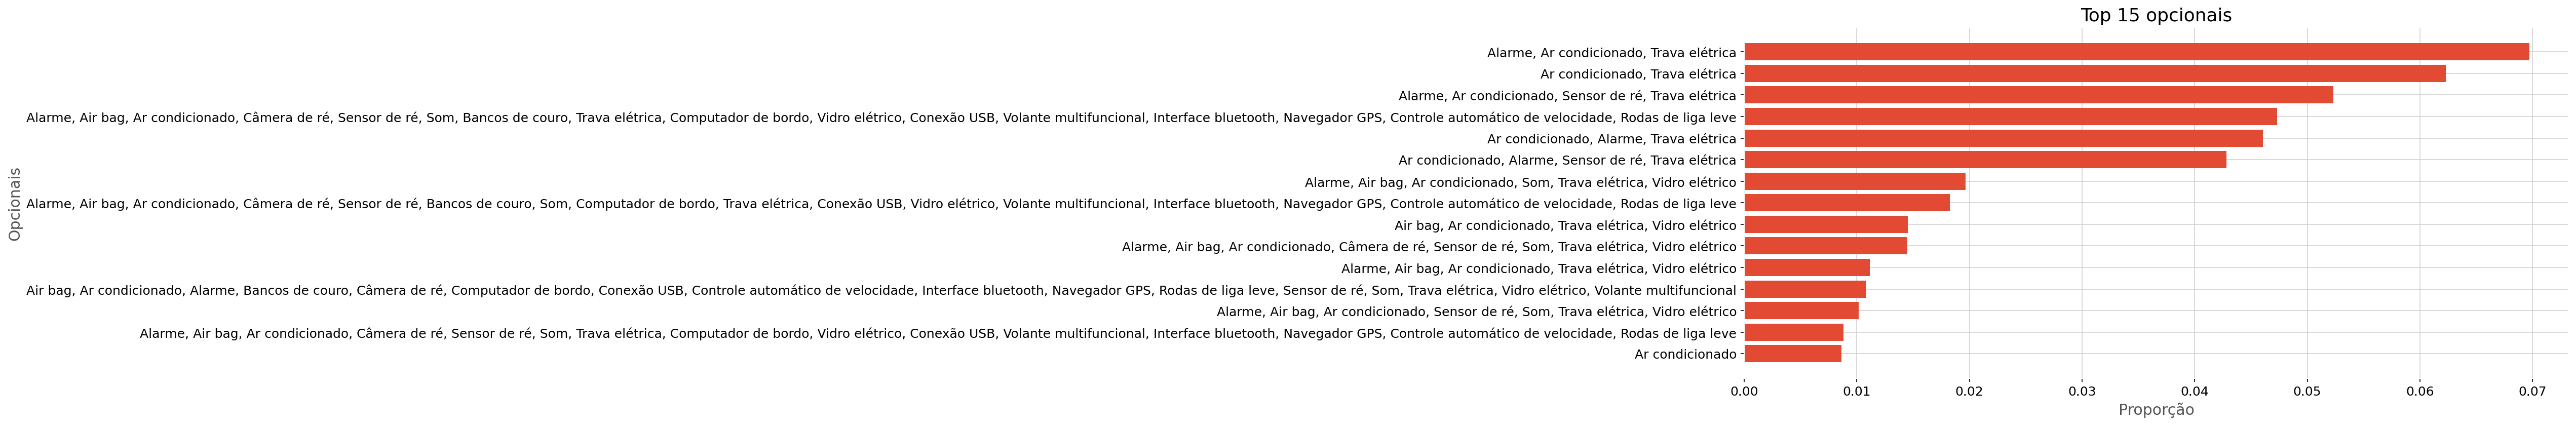

In [179]:
plot_top_n(data=train, feature='opcionais', N=15)

*   Para utilizar a variável `opcionais`  no modelo será necessário realizar algumas alterações.

**INSIGHTS:**
*   Quase a **metade** dos veículos possuem `potência do motor` de até **1.5**
*   Apenas **2%** dos veículos possuem **kit GNV**, essa variável está desbalanceada
*   Aproximadamente **80%** dos veículos usam `combustível` do tipo ***flex***
*   Praticamente **60%**  são veículos com `direção do tipo` ***Elétrica***
*   Aproximadamente a **metade** dos veículos são do `tipo`  **Hatch**

### **Análise Bivariada e Multivariada.**
Irei analisar como as váriáveis ***predictors*** se comportam em relação a nossa variável ***target (preco_brl)***.

#### **Matriz de Correlação**

Vamos analisar a *Matriz de Correlação* e tentar identificar se há alguma correlação entre as variáveis  *predictors* numéricas e tossa variável *target*.

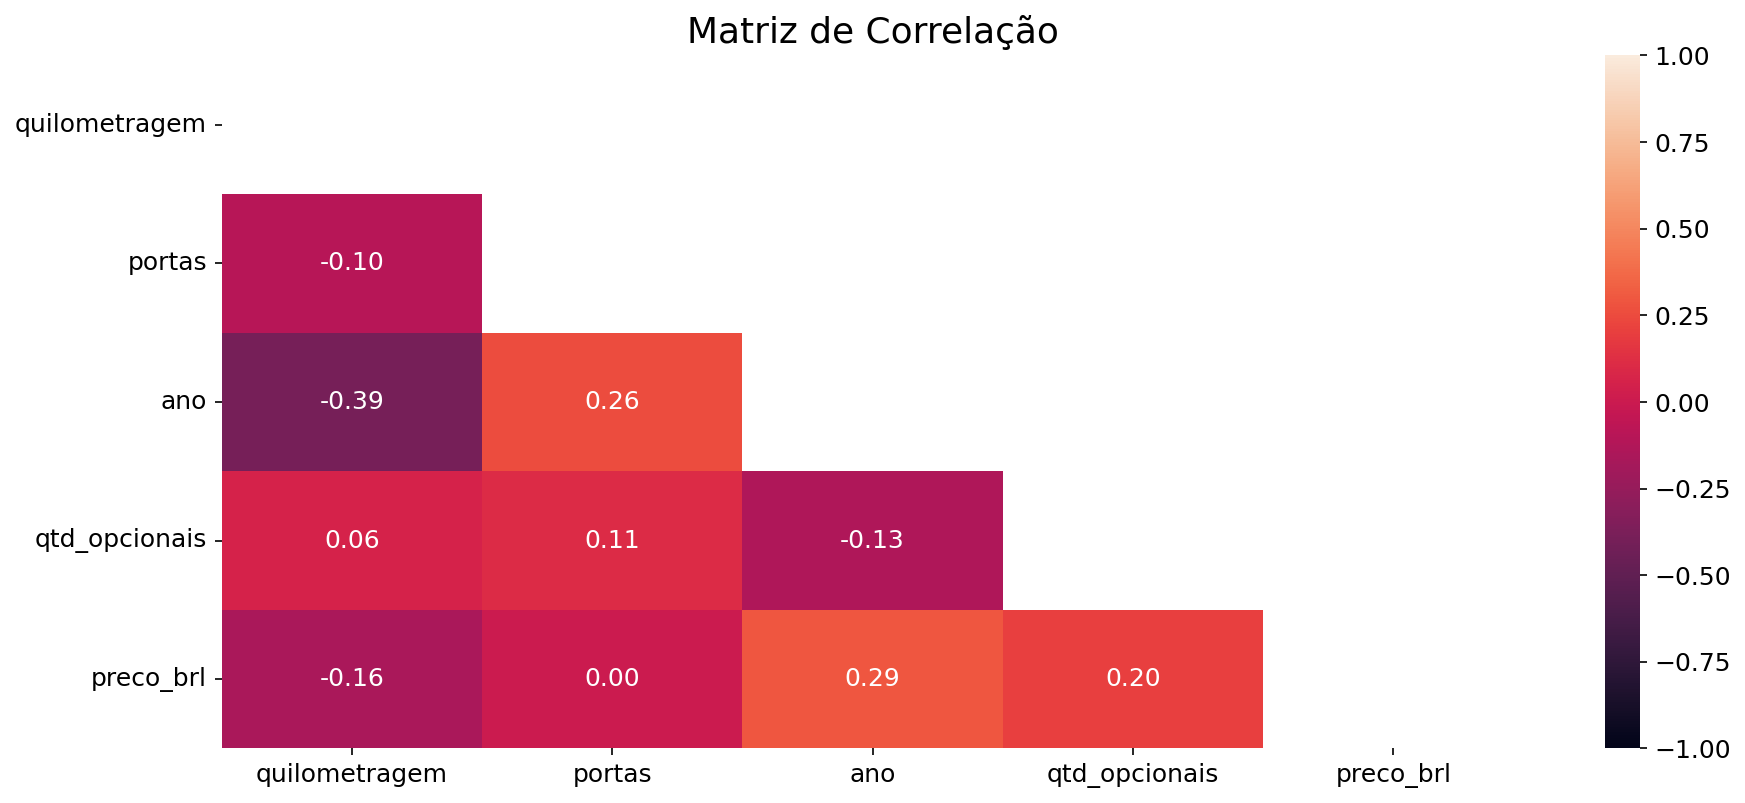

In [180]:
corr = train[num_features + [target]].corr(method='pearson')
mask = np.triu(corr)

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with 'sns.heatmap()'
fig = sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", vmax=1, vmin=-1)
fig.grid(False)
plt.title('Matriz de Correlação')
plt.show()

**INSIGHTS:**
*   `ano` e `quilometragem` possuem uma correlação **linear fraca** com a variável target `preco_brl`.
*   `quilometragem` e `ano` são negativamente correlacionadas de forma *fraca*, o que faz sentido, quanto **mais novo** é o veículo **menos quilômetros** ele já percorreu.

Vamos analisar melhor essas relações:

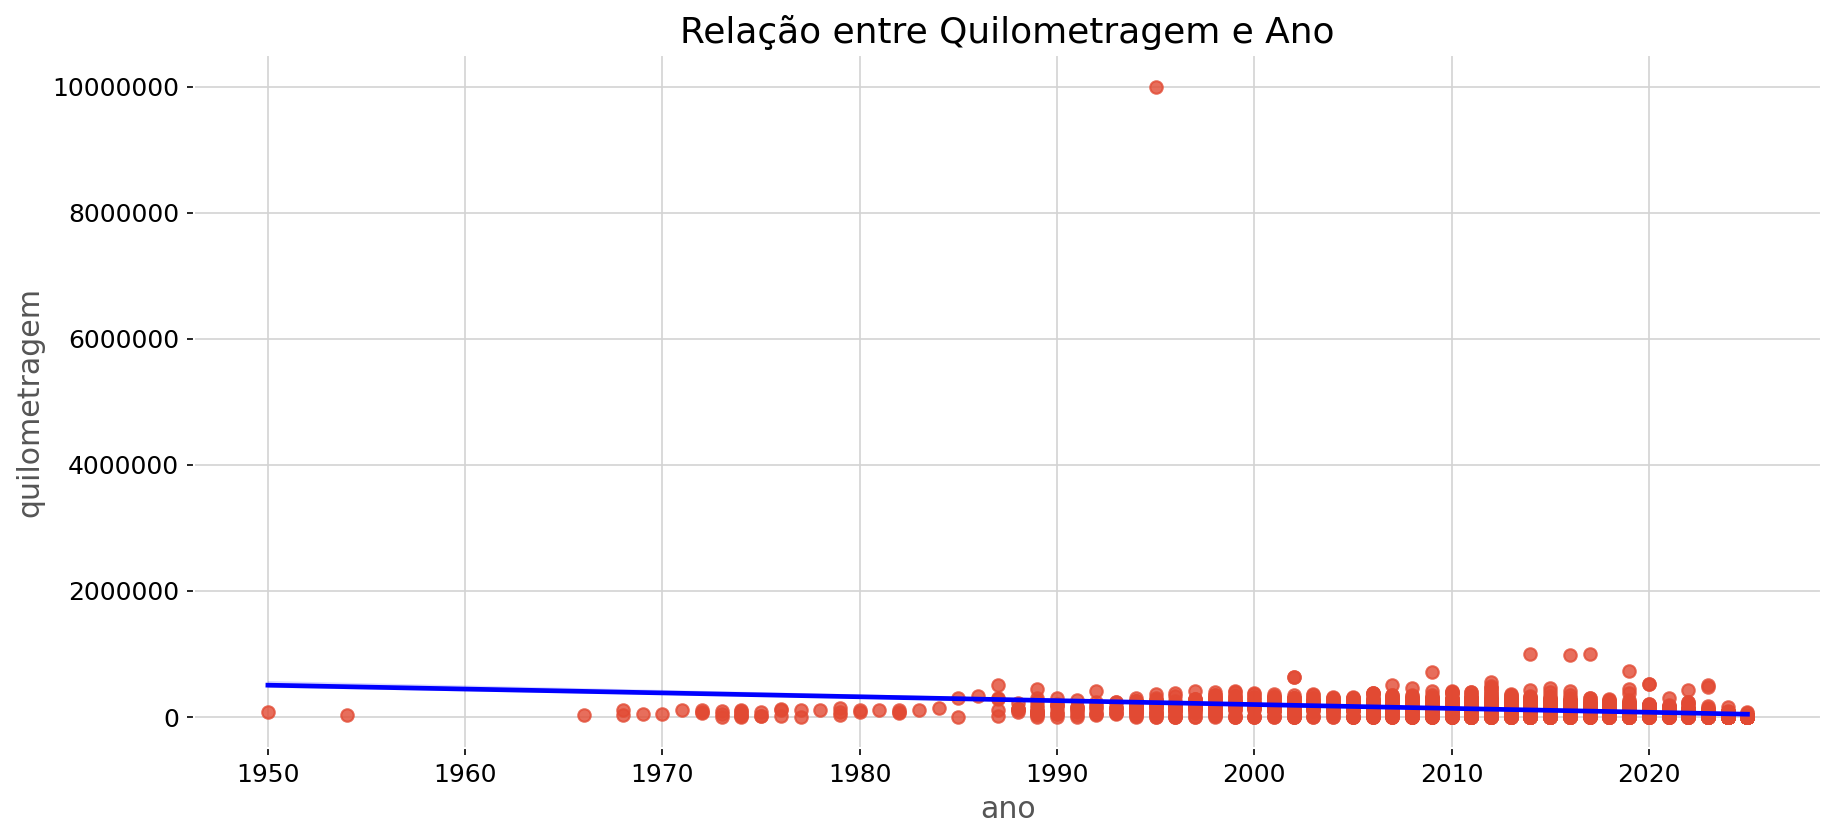

In [181]:
fig = plt.subplots()
sns.regplot(data=train, x='ano', y='quilometragem', line_kws={'color':'blue'})
plt.ticklabel_format(style='plain', axis='y')
plt.title('Relação entre Quilometragem e Ano')
plt.show()

**INSIGHTS:**
*   Um veículo possui aproximadamente **10 Milhões de quilômetros** rodados, uma valor muito discrepante.
*   Curiosamente, uma parte considerável dos veículos com **mais quilômetros** rodados possuem **menos de 10 anos** de uso.

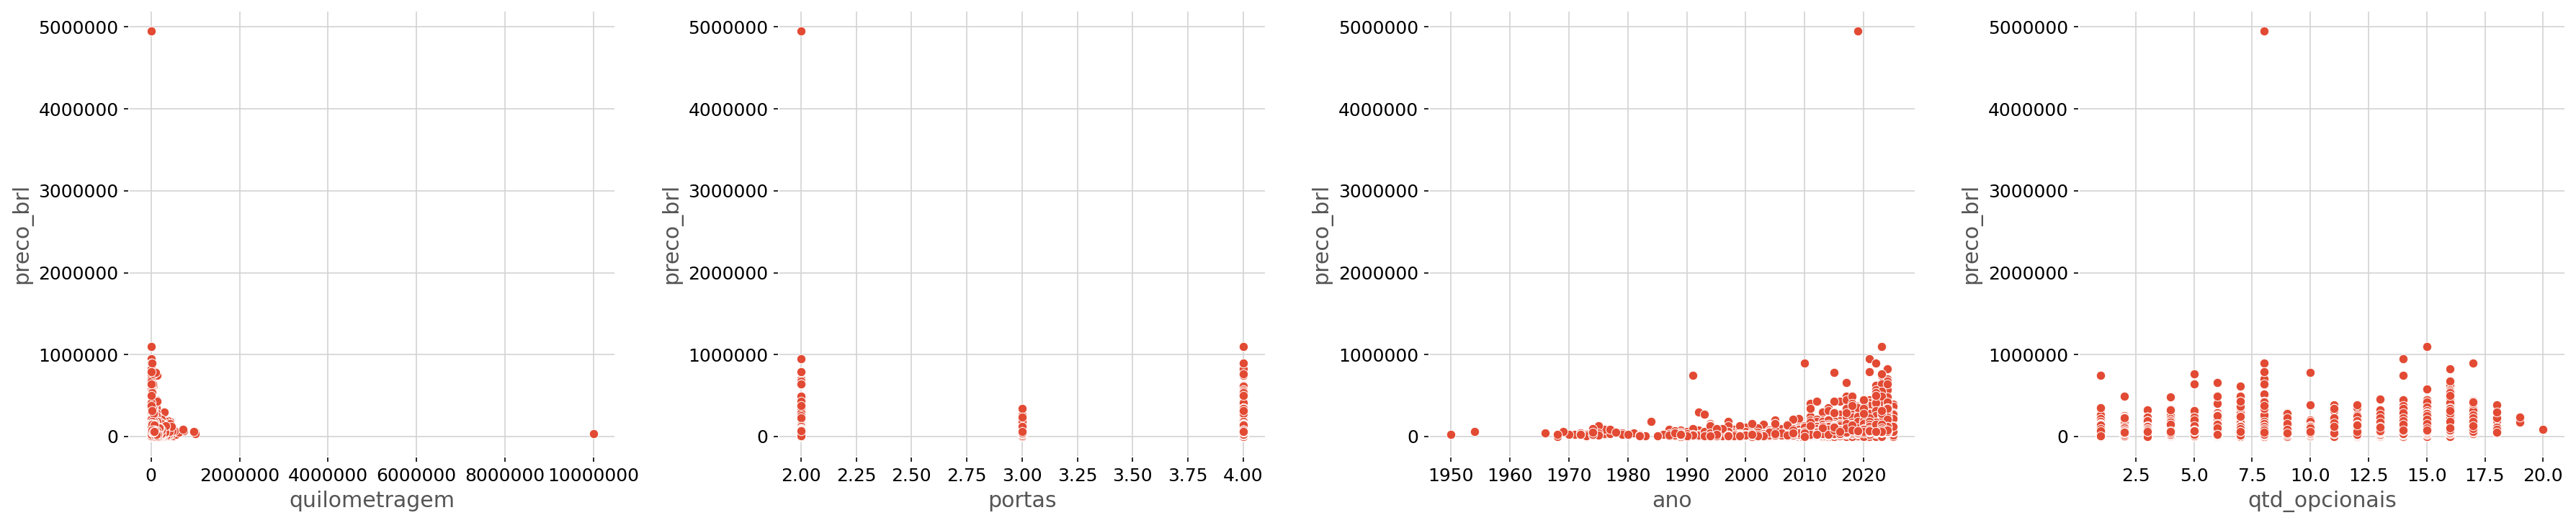

In [182]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))
sns.scatterplot(data=train, x=num_features[0], y=target, ax=axes[0])
sns.scatterplot(data=train, x=num_features[1], y=target, ax=axes[1])
sns.scatterplot(data=train, x=num_features[2], y=target, ax=axes[2])
sns.scatterplot(data=train, x=num_features[3], y=target, ax=axes[3])
for a in range(len(axes)):
    axes[a].ticklabel_format(style='plain', axis='both')
plt.tight_layout()
plt.show()

**INSIGHTS:**
*   Os gráficos se comportam de maneira esperada de acordo a interpretação do *coeficiente de correlação* visto anteriormente.

#### **Distribuição das variáveis categóricas pela variável target**
Irei analisar como as **variáveis categóricas** estão distribuidas em relação a nossa variável ***target***

**Preço médio dos veículos por variável:**

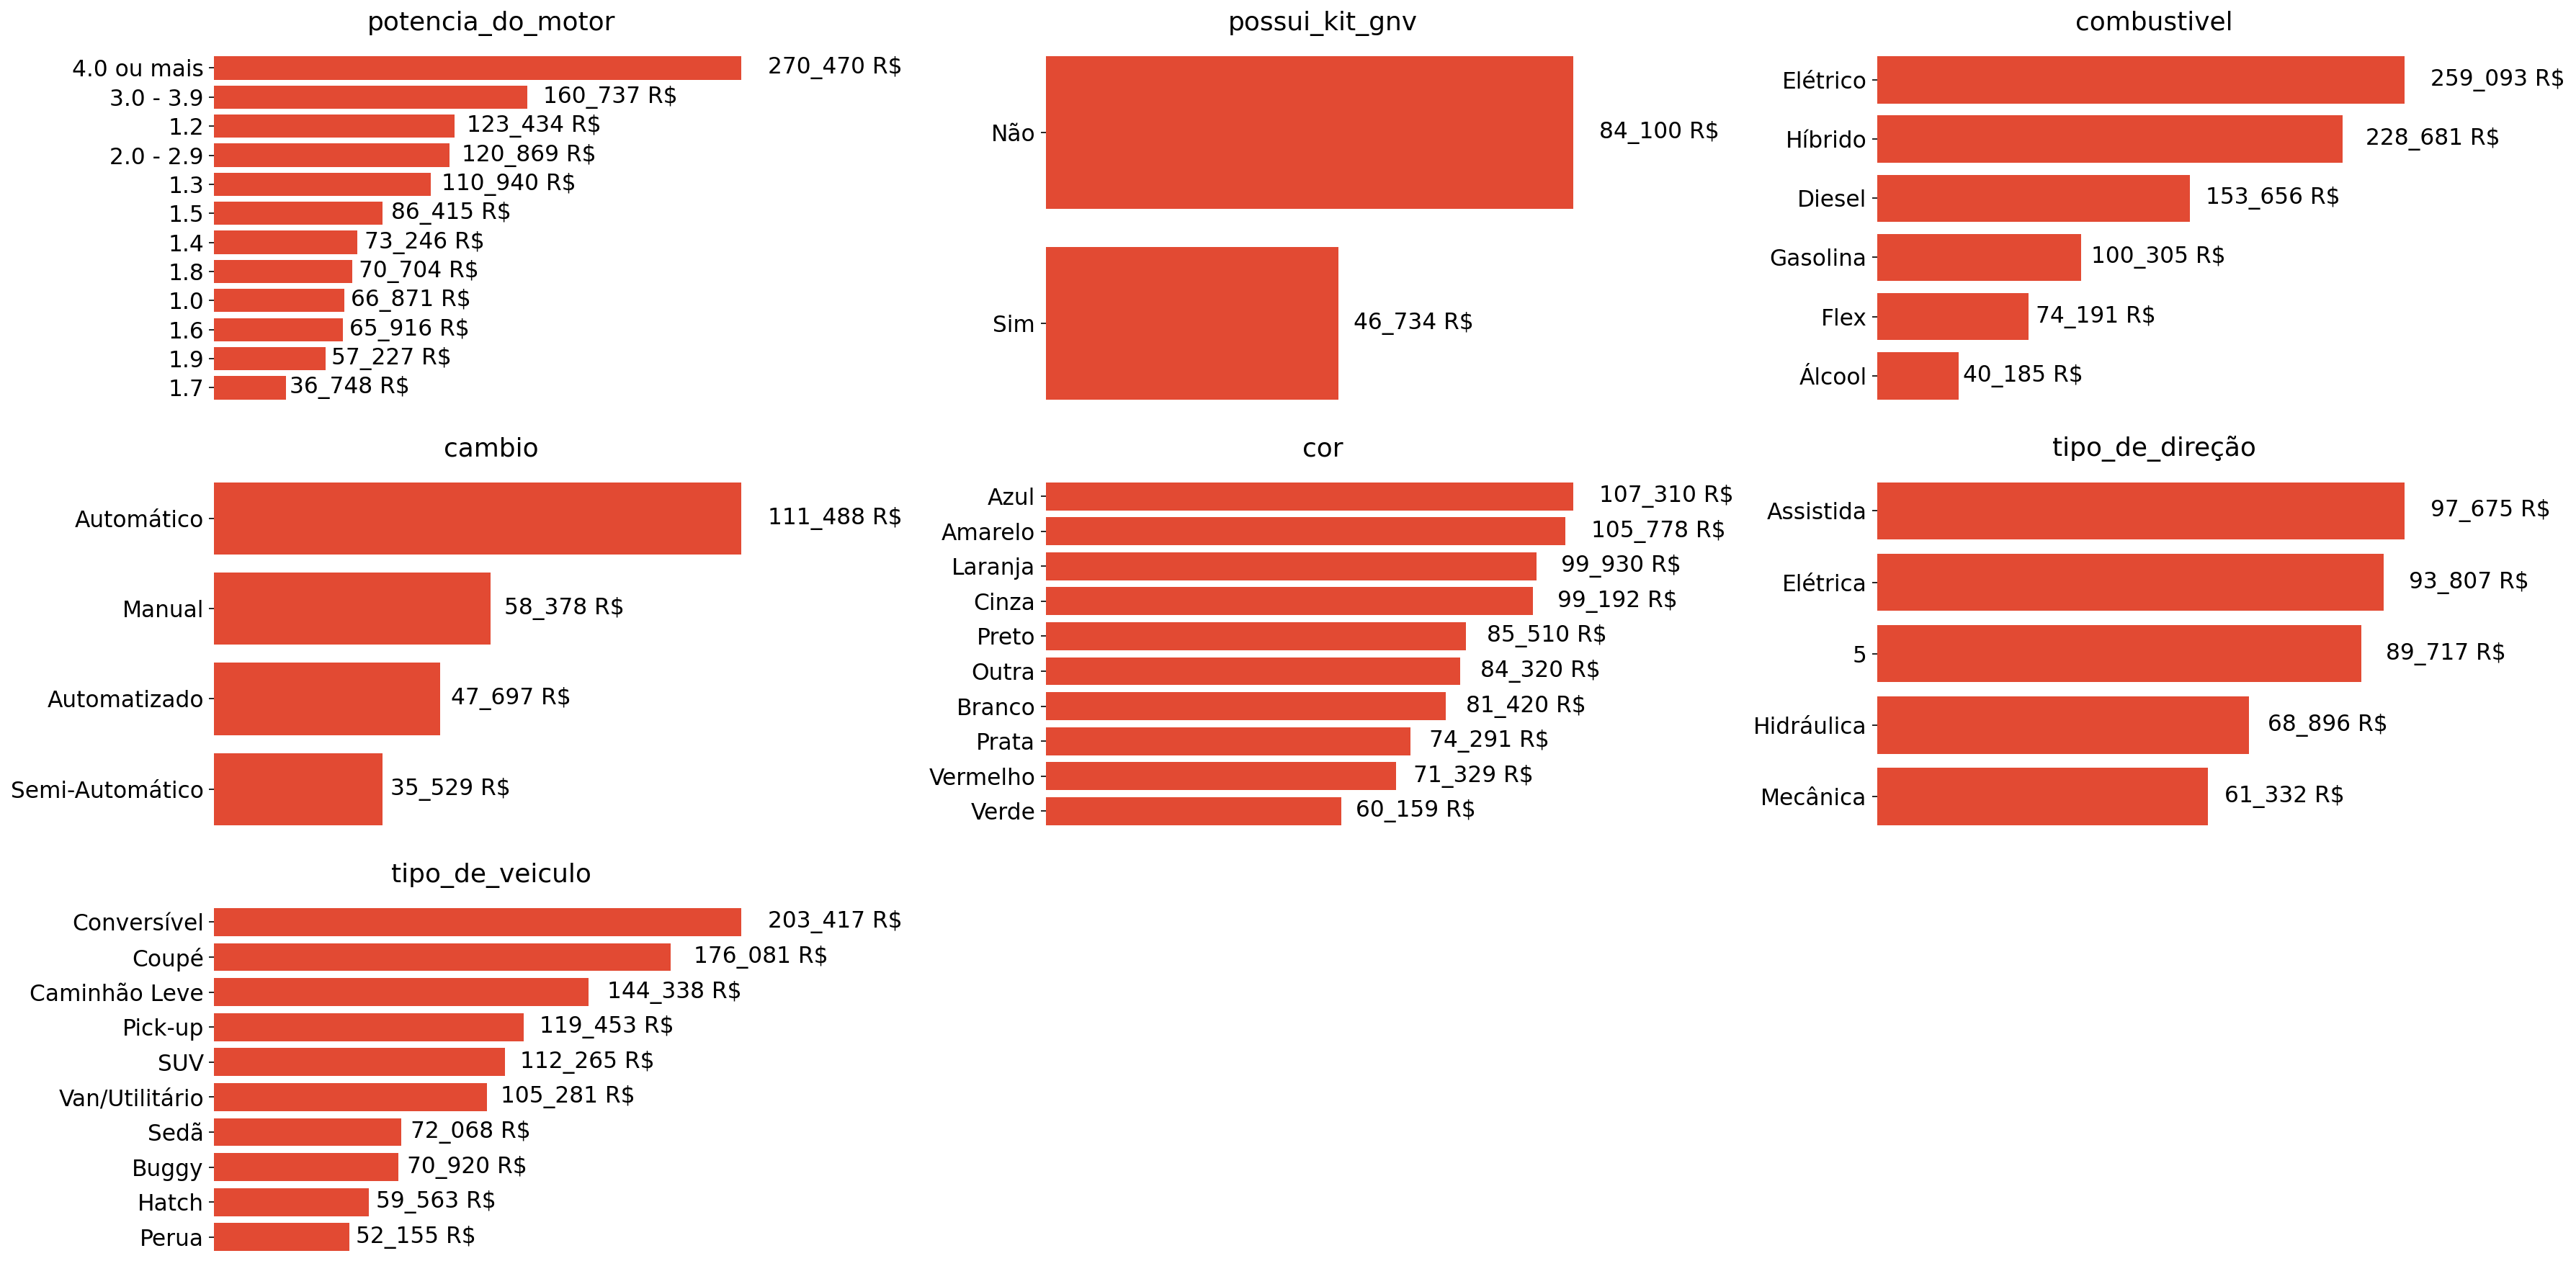

In [183]:
eda_tool.make_eda_plots(data=train, features=cat_features_to_plot, kind='barplot',
                        bar_metric='mean',feature_target=target)

**INSIGHTS:**
*   O **preço médio** dos veículos que possuem `kit_gnv` é **quase o dobro** dos que não possuem, talvez a proporção da variável esteja influenciando no preço tendo em vista que apenas **2%** dos veículos possuem e **98%** não.
*   Carros de `cor` *Azul* tem o **maior preço médio**, quase o dobro dos veículos *Verdes* que representam a **mínima dos preços médios**.
*   Como era de se imaginar os carros com **mais** `potências de motor` possuem os **maiores preços médios**.
*   Carros de `câmbio` **automático** tem o **preço médio** muito superior as demais categorias.

#### **Conclusões da EDA**

**Principais insights:**
*   75% dos veículos possuem até **94.000 km rodados**
*   Alguns carros foram anunciados com preço igaul a **0 R$**
*   Carros com `potência de motor` 2.0 até 2.9 são em *média* **mais baratos** que os com potência 1.2
*   50% dos carros foram lançados em **2022** ou anteriormente.
*   Quantidade de **portas**  e **opcionais** não parecem ter tanta influência no preço do veículo.
